In [1]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import altair as alt

# Primary Productivity in Coastal Waters

## Introduction

This data comes from the [2010 EPA National Aquatic Resource Survey](https://www.epa.gov/national-aquatic-resource-surveys/data-national-aquatic-resource-surveys). The National Coastal Condition Assessment (NCCA) is concerned with primary productivity in coastal waters and will be the main focus of this analysis.

It is also important to know that [primary productivity](https://en.wikipedia.org/wiki/Marine_primary_production) in these coastal waters is often tracked by chlorophyll A levels. In short, primary producers are key to the food chain and their abundance is stimulated by the presence of nutrients, such as nitrogen and phosphorus.

Contained in the GitHub repository where you found this project you may also find the raw data files, clean data files, and individual plot images. It is also encouraged to open the metadata files while reading through the project in case any variable name meanings are confusing.

**Aims:** In this analysis, I aim to use the dataset presented to dissect the relationship between primary productivity and nutrient presence in the U.S. coastal waters. This includes exploration of regional differences as well as potential changes over time in the abundance of these chemicals.

## Analysis

### Part 1: The Dataset

In [2]:
# Here are a few rows of the final cleaned data 
pd.read_csv('ncca_tidy.csv').head(3)

Unnamed: 0  UID State Date Collected  Result    Waterbody SITESAMP Region  \
0           0   59    CA       7/1/2010  0.4075  Mission Bay        Y   West   
1           1   59    CA       7/1/2010  0.0140  Mission Bay        Y   West   
2           2   59    CA       7/1/2010  0.0280  Mission Bay        Y   West   

               Province                               Parameter  
0  Californian Province                 Total Nitrogen (mg N/L)  
1  Californian Province                Nitrate/Nitrite (mg N/L)  
2  Californian Province  Dissolved Inorganic Phosphate (mg P/L)

In [3]:
# Alternative view of cleaned data
pd.read_csv('ncca_tidy_pivot.csv').head(3)

UID State Date Collected      Waterbody Region              Province  \
0   59    CA     2010-07-01    Mission Bay   West  Californian Province   
1   60    CA     2010-07-01  San Diego Bay   West  Californian Province   
2   61    CA     2010-07-01    Mission Bay   West  Californian Province   

  SITESAMP  Ammonia (mg N/L)  Chlorophyll A (ug/L)  \
0        Y              0.00                  3.34   
1        Y              0.01                  2.45   
2        Y              0.00                  3.82   

   Dissolved Inorganic Nitrogen (mg N/L)  ...  Nitrate (mg N/L)  \
0                                  0.014  ...               NaN   
1                                  0.020  ...               NaN   
2                                  0.009  ...               NaN   

   Nitrate/Nitrite (mg N/L)  Nitrite (mg N/L)  Nitrogen Particulate (mg N/L)  \
0                     0.014               NaN                            NaN   
1                     0.010               NaN                            NaN   
2                     0.009               NaN                            NaN   

   Phosphorus Particulate (mg P/L)  Total Dissolved Nitrogen (mg N/L)  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   

   Total Dissolved Phosphorus (mg P/L)  Total Kjeldahl Nitrogen (mg N/L)  \
0                                  NaN                               NaN   
1                                  NaN                               NaN   
2                                  NaN                               NaN   

   Total Nitrogen (mg N/L)  Total Phosphorus (mg P/L)  
0                  0.40750                   0.061254  
1                  0.23000                   0.037379  
2                  0.33625                   0.048100  

[3 rows x 22 columns]

I chose to have two separate tidy dataframes, they contain the same information, but one is pivoted to display a variable differently. The first dataset, `ncca_tidy.csv` , contains all the necessary variables for the questions
asked in this analysis. 

- `UID` serves as an index for the data. 
- `State` is the U.S. state that the sample was taken in. 
- `Date Collected` is the date that the sample was taken at the site. 
- `Waterbody` is the specific body of water the sample was taken at. 
- `SITESAMP` is an indicator whether a sample was actually taken, where Y is 'Yes' and N is 'No'. 
- `Province` is the geographical province that the sample was taken at. 
- `Parameter` is a set of chemicals and their measurement units, where the numerical results of the measurement are stored in the `Results` variable. 

The parameters are easier to look at when viewing the pivoted dataset, `ncca_tidy_pivot.csv`. Both datasets were necessary for the analysis, as finding statistics of specific chemicals is easier with the pivoted dataset, while doing grouped plots is much more streamlined with the unpivoted dataset. Regarding the
parameters/chemicals that will be used to answer the questions, Chlorophyll A (ug/L), Total Nitrogen (mg N/L), and Total Phosphorus (mg P/L) will be the only ones used because they have the least missing observations.
Also, Nitrogen/Phosphorus are the two main nutrients that stimulate Chlorophyll A (a proxy for primary production). As for the measurements for parameters/chemicals that were not Nitrogen, Phosphorus, and
Chlorophyll A were still kept in the clean data in case further analysis of other nutrients is of interest in the future.

---

### Part 2: Data Exploration and Questions

**Is there a relationship between nutrient availability and primary productivity? How strong is this relationship?**

The relationship present seems to be that areas with higher Total Nitrogen/Total Phosphorus amounts tend to have higher presence of Chlorophyll A as well, meaning that higher nutrient availability does seem to promote
higher productivity. This result is show in the graphs below, where Total Phosphorus was put on the square root scale and Total Nitrogen was put on the log scale for clearer visualization. In the blue colored plot, Total
Phosphorus is plotted against Chlorophyll A levels, showing there is an upwards trend in Chlorophyll A amounts as we move along the x-axis. A similar result is shown in the red colored plot, meaning higher Total Nitrogen
levels correlate with higher Chlorophyll A (productivity) amounts. We also see a relationship between Total Phosphorus and Total Nitrogen exists in the green colored plot, where Total Nitrogen and Total Phosphorus seem
positively correlated, meaning if an area is high on one nutrient it is likely to be high on the other. 

We can confirm visual results with a correlation matrix, displayed in the code as `ncca_corr`. There is somehwat of a positive correlation between all 3 variables mentioned. Total Nitrogen (mg N/L) was found to be moderately correlated with Chlorophyll A (ug/L), r = 0.64. Similarly Total Phosphorus
(mg P/L) was slightly less positively correlated with Chlorophyll A (ug/L), r = 0.51. Finally, Total Nitrogen and Total Phosphorus were also positively correlated, r = 0.57.

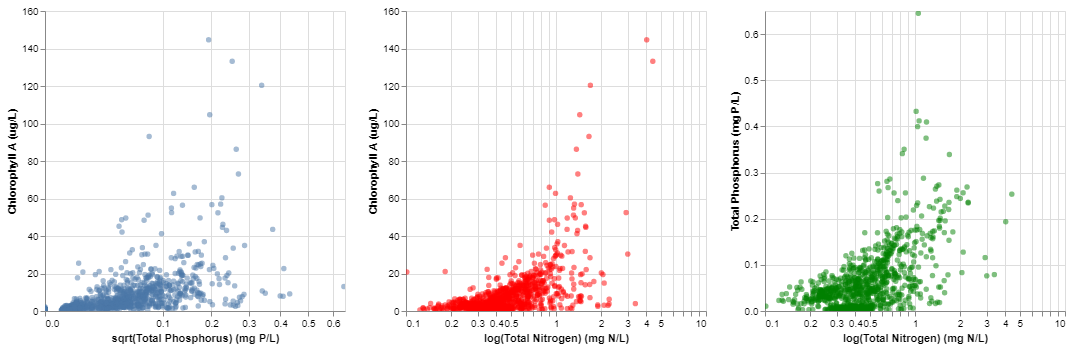

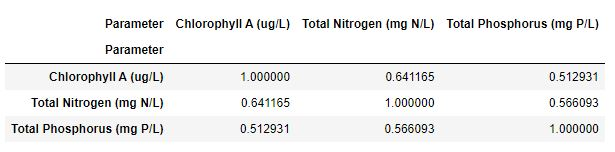

**Do U.S. Coastal Regions vary in the abundance of nutrients?**

The regions seem to have fairly similar distributions in their availability of Total Nitrogen and Total Phosphorus. It is worth noting that the Phosphorus levels seem to be more consistent across regions, while Nitrogen is
more varied. This can most clearly be seen in the Great Lakes region, where Nitrogen has a clear peak around 0.4 and other regions do not display such a clear peak in Nitrogen levels and are more spread out. When
grouping by region, we can see that the numbers reflect our findings from the graph. We can see from the dataframe param_vars that Total Phosphorus has lower variance than Total Nitrogen in all regions. We can also
get information from the `param_means` (see Code section) dataframe that is hard to derive from the plots; we see that Gulf region is of interest because it has the highest mean Total Phosphorus (0.094 mg P/L) and Total Nitrogen (0.689 mg
N/L). The dataframes are displayed in full in the code below

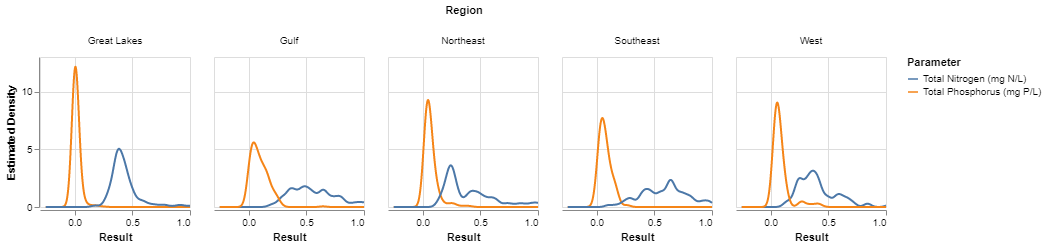

**Does geographical location seem to affect productivity (Chlorophyll A levels)?**

Yes. If we are considering Chlorophyll A (ug/L) as the primary measure of productivity, then there does seem to be some variation in productivity when sorted geographically. We can see from the plot below, which displays
the distribution of Cholorohphyll A values in each region, further separated by state. We can see that within each region, there is little variation, as the states all have similar distributions of Cholorophyll A results. However,
there is some variation between regions, as they have slightly different distributions. They all look like somewhat normal density curves, but have different variances, with some having spikes of outliers which would further
increase variance. 

For example, even though Great Lakes region looks like it would have less variance than the Gulf region due to its large peaks, it actually has more variation in productivity due to outliers (proven by results of dataframe `chla_var` ). Another interesting trait is that sometimes these spikes will be similar for multiple states within a region. For example, in the Southeast region we can see that GA and FL both have a
density spike around 50. The states were included in this analysis to rule out the possibility of variation occuring within a region. Try to not focus on the legend/individual states in this graphic, this many states were included just to be able to show that patterns do exist geographically. Analysis of the `Province` variable was considered, but ultimately scrapped because of the
large number of provinces in the dataset creating an even more confusing graphic.

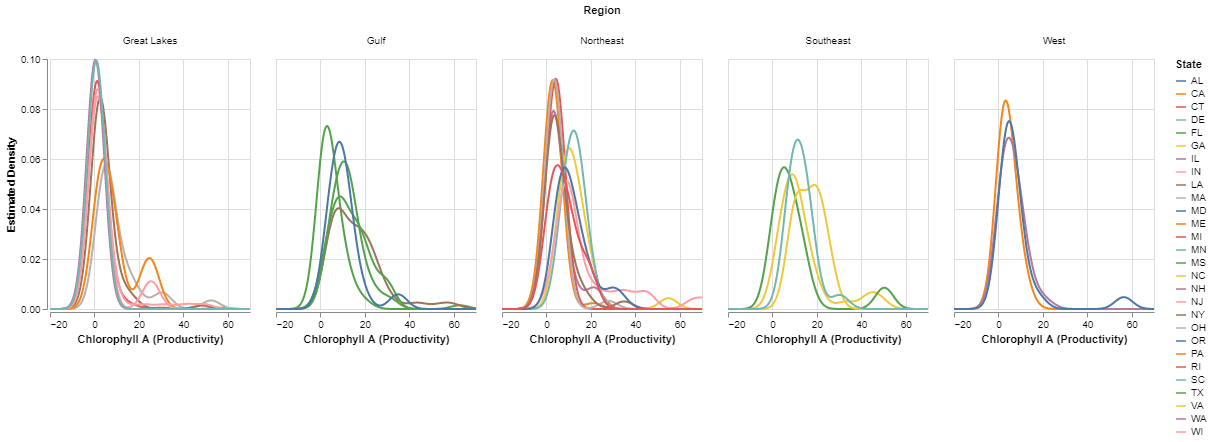

**How does primary productivity in California coastal waters change seasonally in 2010?**

There does seem to be some seasonal variation in primary productivity in California coastal waters in 2010. To answer this question, I will be considering the seasons as following: Winter (January, February, March),
Spring (April, May, June), Summer (July, August, September), and Fall (October, November, December). We can see from the dataframe `szn_means` that for this dataset, there we no site visits in the Winter or Fal. This
leaves us with Spring and Summer, and by looking at the `szn_means` dataframe we can see that Summer (4.25 ug/L) has a higher mean Chlorophyll A amount than Spring (2.88 ug/L). This would imply that primary
productivity does change seasonally, and is higher in the Summer. This does make intuitive sense because Chlorophyll A is highly important in the process of photosynthesis, and there would be more sunlight in the
Summer than in the Spring. The plot below displays the density distributions of Cholorophyll A for each season, where we can see that Summer is slightly distributed more to the right than Spring, thus having higher
Chlorophyll A amounts which corresponds to higher productivity.


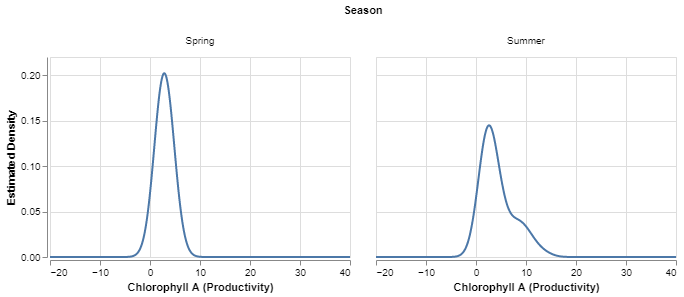

However, there is a slight concern with this analysis, which I will address here. While the sorting dates by seasons was successful, there are a total of 52 observations classified as Summer, and only 7 observations in the
Spring. This could lead to the Spring being inaccurate due to having too few data points, and Summer only seems larger because it has more data. To remedy this concern, I will plot Date Collected against Chlorophyll A
amounts to see how Chlorophyll A changes over time, rather than trying to separate it by season. This is done in the plot below, where it confirms the previous analysis that Chlorophyll A levels are higher in the Summer,
potentially due to there being more sunlight. We can even get more information from this graph, as we learn from the LOESS curve that the Chlorophyll A amount spikes in August, rather than gradually trends upwards as
Summer time is approached. This method is still slightly flawed due to sampling dates being sporadic and unevenly spread out, but it is consistent with the previous analysis and shows exactly what we would expect.

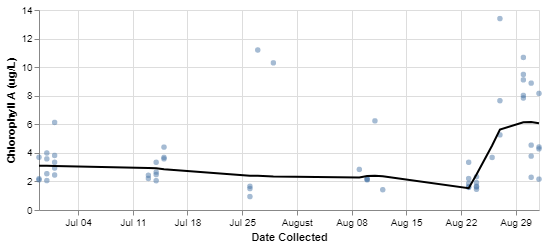

**Of the waterbodies in California, what are the top 5 with the highest primary productivity levels in 2010? What about the availability of nutrients in these waterbodies?**

To do this analysis, the dataframe was first filtered to include only samples from California. Then, the data was grouped by Waterbody, and the mean of Chlorophyll A levels within each waterbody sample was taken. By
then sorting by Chlorophyll A, descending, we could observe the first five rows to obtain the top five waterbodies with the highest productivity in 2010. Those waterbodies, in order, were San Luis Obispo Bay, Lower South
Bay, South Bay, Drakes Bay, and Tomales Bay. The plot below shows Nitrogen/Phosphorus (nutrients) plotted against Chlorophyll A. The relationship seems somewhat unstable, possibly due to the low sample size but
through the plots you can roughly see that waterbodies with higher nutrient availability likely have higher levels of Chlorophyll A. This is consistent with our previous findings. It is also worth noting that the waterbodies
with many samples, South Bay and Lower South Bay, began to form clusters of data. This shows that the sampling has some consistency, and waterbodies are not just outputting random levels of nutrients or Chlorophyll A
in the samples taken. The pattern also appears similar for Phosphorus and Nitrogen, suggesting that these nutrients are of equal importance in stimulating primary productivity and Chlorophyll A.

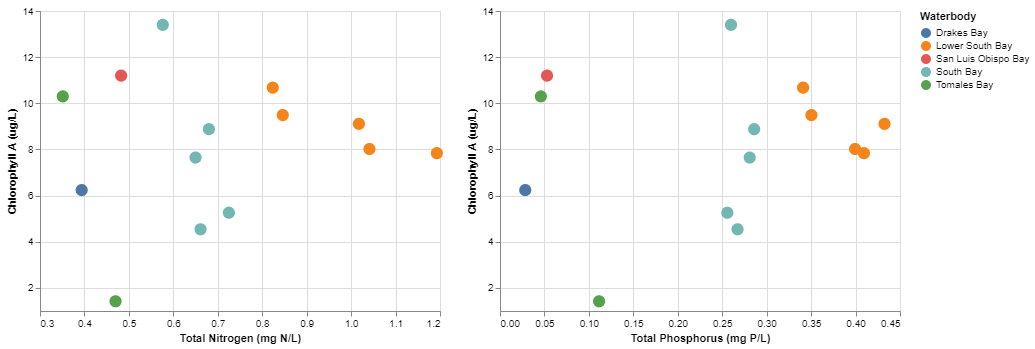

---

## Codes

### Data Cleaning

In [5]:
# Import the raw data
ncca_raw = pd.read_csv('assessed_ncca2010_waterchem.csv')
ncca_sites = pd.read_csv('assessed_ncca2010_siteinfo.csv')

In [6]:
ncca_raw.head(3)

UID      SITE_ID STATE  DATE_COL  BATCH_ID PARAMETER  \
0   59  NCCA10-1111    CA  7/1/2010  100714.1       NTL   
1   59  NCCA10-1111    CA  7/1/2010  100708.1    NO3NO2   
2   59  NCCA10-1111    CA  7/1/2010  100708.1       SRP   

                  PARAMETER_NAME  RESULT   UNITS     MDL     MRL  PQL  \
0                 Total Nitrogen  0.4075  mg N/L  0.0150  0.0300  NaN   
1                Nitrate/Nitrite  0.0140  mg N/L  0.0020  0.0040  NaN   
2  Dissolved Inorganic Phosphate  0.0280  mg P/L  0.0027  0.0054  NaN   

  DATE_ANALYZED  HOLDING_TIME QACODE LAB_SAMPLE_ID  SAMPLE_ID METHOD  
0     7/14/2010          13.0    NaN       1010242   568671.0    NaN  
1      7/8/2010           7.0    NaN       1010242   568673.0    NaN  
2      7/8/2010           7.0    NaN       1010242   568673.0    NaN

In [7]:
ncca_sites.head(3)

UID      SITE_ID STATE  VISIT_NO  DATE_COL       WTBDY_NM SITESAMP  \
0   59  NCCA10-1111    CA       1.0  1-Jul-10    Mission Bay        Y   
1   60  NCCA10-1119    CA       1.0  1-Jul-10  San Diego Bay        Y   
2   61  NCCA10-1123    CA       1.0  1-Jul-10    Mission Bay        Y   

  INDEX_VISIT  EPA_REG NCCR_REG  ... NPSPARK PANEL        STATUS10  \
0           Y        9     West  ...     NaN  Base  Target_Sampled   
1           Y        9     West  ...     NaN  Base  Target_Sampled   
2           Y        9     West  ...     NaN  Base  Target_Sampled   

      STRATUM     TNT            WGT_CAT  WGT_NCCA10             RSRC_CLASS  \
0  CalP_Other  Target  NCA_CA_CalP_Other    2.503632  NCA_Estuarine_Coastal   
1  CalP_Other  Target  NCA_CA_CalP_Other    5.255002  NCA_Estuarine_Coastal   
2  CalP_Other  Target  NCA_CA_CalP_Other    2.503632  NCA_Estuarine_Coastal   

  QA_CODES COMMENT  
0      NaN     NaN  
1      NaN     NaN  
2      NaN     NaN  

[3 rows x 31 columns]

In [8]:
# Drop some of the columns not needed to make merging easier
ncca_sites = ncca_sites.drop(columns = ['STATE', 'VISIT_NO', 'DATE_COL', 'SITE_ID', 'TNT',
 'STRATUM', 'COMMENT', 'WGT_CAT', 'NPSPARK'])

In [9]:
# Merge the datasets
ncca = pd.merge(ncca_raw, ncca_sites, how = 'left', on = 'UID')

In [10]:
ncca.head(3)

UID      SITE_ID STATE  DATE_COL  BATCH_ID PARAMETER  \
0   59  NCCA10-1111    CA  7/1/2010  100714.1       NTL   
1   59  NCCA10-1111    CA  7/1/2010  100708.1    NO3NO2   
2   59  NCCA10-1111    CA  7/1/2010  100708.1       SRP   

                  PARAMETER_NAME  RESULT   UNITS     MDL  ...    ALON_DD  \
0                 Total Nitrogen  0.4075  mg N/L  0.0150  ... -117.21471   
1                Nitrate/Nitrite  0.0140  mg N/L  0.0020  ... -117.21471   
2  Dissolved Inorganic Phosphate  0.0280  mg P/L  0.0027  ... -117.21471   

   MAP_DATUM DSNTYPE             MDCATY NEP_NM PANEL        STATUS10  \
0      WGS84    NCCA  CalP_Other_(5,20]    NaN  Base  Target_Sampled   
1      WGS84    NCCA  CalP_Other_(5,20]    NaN  Base  Target_Sampled   
2      WGS84    NCCA  CalP_Other_(5,20]    NaN  Base  Target_Sampled   

  WGT_NCCA10             RSRC_CLASS QA_CODES  
0   2.503632  NCA_Estuarine_Coastal      NaN  
1   2.503632  NCA_Estuarine_Coastal      NaN  
2   2.503632  NCA_Estuarine_Coastal      NaN  

[3 rows x 39 columns]

In [11]:
# Drop more columns not relevant to analysis in merged set
ncca = ncca.drop(columns = ['SITE_ID', 'BATCH_ID', 'PARAMETER', 'MDL',
 'MRL', 'PQL', 'DATE_ANALYZED', 'HOLDING_TIME', 'EPA_REG',
 'QACODE', 'LAB_SAMPLE_ID', 'METHOD', 'INDEX_VISIT', 'SAMPLE_ID',
 'NCA_REGION', 'COUNTRY', 'STATION_DEPTH', 'STATION_DEPTH_UNITS',
 'ALAT_DD', 'ALON_DD', 'MAP_DATUM', 'DSNTYPE', 'MDCATY', 'NEP_NM',
 'PANEL', 'STATUS10', 'WGT_NCCA10', 'RSRC_CLASS', 'QA_CODES'])


In [12]:
ncca.head(3)

UID STATE  DATE_COL                 PARAMETER_NAME  RESULT   UNITS  \
0   59    CA  7/1/2010                 Total Nitrogen  0.4075  mg N/L   
1   59    CA  7/1/2010                Nitrate/Nitrite  0.0140  mg N/L   
2   59    CA  7/1/2010  Dissolved Inorganic Phosphate  0.0280  mg P/L   

      WTBDY_NM SITESAMP NCCR_REG              PROVINCE  
0  Mission Bay        Y     West  Californian Province  
1  Mission Bay        Y     West  Californian Province  
2  Mission Bay        Y     West  Californian Province

In [13]:
# Rename columns to make it more interpretable
ncca.rename(columns={'DATE_COL': 'Date Collected', 'PARAMETER_NAME': 'Nutrient',
 'WTBDY_NM': 'Waterbody', 'NCCR_REG': 'Region',
 'STATE': 'State', 'RESULT': 'Result', 'PROVINCE': 'Province'}, inplace=True)
ncca.head(3)


UID State Date Collected                       Nutrient  Result   UNITS  \
0   59    CA       7/1/2010                 Total Nitrogen  0.4075  mg N/L   
1   59    CA       7/1/2010                Nitrate/Nitrite  0.0140  mg N/L   
2   59    CA       7/1/2010  Dissolved Inorganic Phosphate  0.0280  mg P/L   

     Waterbody SITESAMP Region              Province  
0  Mission Bay        Y   West  Californian Province  
1  Mission Bay        Y   West  Californian Province  
2  Mission Bay        Y   West  Californian Province

In [14]:
# Merge Nutrient and UNITS
ncca['Parameter'] = ncca['Nutrient'] + ' (' + ncca['UNITS'] + ')'
ncca = ncca.drop(columns = ['Nutrient', 'UNITS'])
ncca.head(3)

UID State Date Collected  Result    Waterbody SITESAMP Region  \
0   59    CA       7/1/2010  0.4075  Mission Bay        Y   West   
1   59    CA       7/1/2010  0.0140  Mission Bay        Y   West   
2   59    CA       7/1/2010  0.0280  Mission Bay        Y   West   

               Province                               Parameter  
0  Californian Province                 Total Nitrogen (mg N/L)  
1  Californian Province                Nitrate/Nitrite (mg N/L)  
2  Californian Province  Dissolved Inorganic Phosphate (mg P/L)

In [15]:
# Pivot appropriately for an alternate view of table
ncca_mod1 = ncca.pivot(index = ['UID', 'State', 'Date Collected', 'Waterbody',
 'Region', 'Province', 'SITESAMP'],
 columns = 'Parameter',
 values = 'Result').reset_index(level = ['State', 'Date Collected',
 'Waterbody', 'Region', 'Province', 'SITESAMP'])
ncca_mod1.head(3)

Parameter State Date Collected      Waterbody Region              Province  \
UID                                                                          
59           CA       7/1/2010    Mission Bay   West  Californian Province   
60           CA       7/1/2010  San Diego Bay   West  Californian Province   
61           CA       7/1/2010    Mission Bay   West  Californian Province   

Parameter SITESAMP  Ammonia (mg N/L)  Chlorophyll A (ug/L)  \
UID                                                          
59               Y              0.00                  3.34   
60               Y              0.01                  2.45   
61               Y              0.00                  3.82   

Parameter  Dissolved Inorganic Nitrogen (mg N/L)  \
UID                                                
59                                         0.014   
60                                         0.020   
61                                         0.009   

Parameter  Dissolved Inorganic Phosphate (mg P/L)  ...  Nitrate (mg N/L)  \
UID                                                ...                     
59                                          0.028  ...               NaN   
60                                          0.026  ...               NaN   
61                                          0.030  ...               NaN   

Parameter  Nitrate/Nitrite (mg N/L)  Nitrite (mg N/L)  \
UID                                                     
59                            0.014               NaN   
60                            0.010               NaN   
61                            0.009               NaN   

Parameter  Nitrogen Particulate (mg N/L)  Phosphorus Particulate (mg P/L)  \
UID                                                                         
59                                   NaN                              NaN   
60                                   NaN                              NaN   
61                                   NaN                              NaN   

Parameter  Total Dissolved Nitrogen (mg N/L)  \
UID                                            
59                                       NaN   
60                                       NaN   
61                                       NaN   

Parameter  Total Dissolved Phosphorus (mg P/L)  \
UID                                              
59                                         NaN   
60                                         NaN   
61                                         NaN   

Parameter  Total Kjeldahl Nitrogen (mg N/L)  Total Nitrogen (mg N/L)  \
UID                                                                    
59                                      NaN                  0.40750   
60                                      NaN                  0.23000   
61                                      NaN                  0.33625   

Parameter  Total Phosphorus (mg P/L)  
UID                                   
59                          0.061254  
60                          0.037379  
61                          0.048100  

[3 rows x 21 columns]

In [16]:
# Change dates from strings to dates, this might be useful during analysis
ncca_mod1['Date Collected'] = pd.to_datetime(ncca_mod1['Date Collected'], format = '%m/%d/%Y')


In [17]:
# Check for missing values
ncca_mod1.isna().mean()

Parameter
State                                     0.000000
Date Collected                            0.000000
Waterbody                                 0.000000
Region                                    0.000000
Province                                  0.000000
SITESAMP                                  0.000000
Ammonia (mg N/L)                          0.000916
Chlorophyll A (ug/L)                      0.009158
Dissolved Inorganic Nitrogen (mg N/L)     0.000000
Dissolved Inorganic Phosphate (mg P/L)    0.001832
Dissolved Silica (mg/L)                   0.978938
Nitrate (mg N/L)                          0.958791
Nitrate/Nitrite (mg N/L)                  0.000000
Nitrite (mg N/L)                          0.947802
Nitrogen Particulate (mg N/L)             0.978938
Phosphorus Particulate (mg P/L)           0.978938
Total Dissolved Nitrogen (mg N/L)         0.978938
Total Dissolved Phosphorus (mg P/L)       0.978938
Total Kjeldahl Nitrogen (mg N/L)          0.972527
Total Nitrogen (mg N/

*The measurements for Chlorophyll, Total Nitrogen, and Total Phosphorus seem to be missing the least, so we will use those going forward with analysis of nutrients.*


In [18]:
# Export cleaned data as .csv files
ncca.to_csv('ncca_tidy.csv')
ncca_mod1.to_csv('ncca_tidy_pivot.csv')


## Data Exploration

### P1.

In [19]:
# Is there a relationship between nutrient availability and productivity?

In [20]:
phos = alt.Chart(ncca_mod1).mark_circle(
    opacity = 0.5,
    clip = True,
).encode(
    x = alt.X('Total Phosphorus (mg P/L):Q',
              title = 'sqrt(Total Phosphorus) (mg P/L)',
              scale=alt.Scale(type='sqrt')
             ),
    y = 'Chlorophyll A (ug/L):Q'
).properties(
    height = 300,
    width = 300
)

nitr = alt.Chart(ncca_mod1).mark_circle(
    color='red',
    opacity = 0.5,
    clip = True
).encode(
    x = alt.X('Total Nitrogen (mg N/L):Q',
              title='log(Total Nitrogen) (mg N/L)',
              scale=alt.Scale(type='log')
             ),
    y = 'Chlorophyll A (ug/L):Q'
).properties(
 height = 300,
 width = 300
)

phos_nitr = alt.Chart(ncca_mod1).mark_circle(
    color= 'green',
    opacity = 0.5,
    clip = True
 ).encode(
    x = alt.X('Total Nitrogen (mg N/L):Q',
              title='log(Total Nitrogen) (mg N/L)',
              scale=alt.Scale(type='log')
             ),
    y = 'Total Phosphorus (mg P/L):Q'
).properties(
    height = 300,
    width = 300
)

phos | nitr | phos_nitr



alt.HConcatChart(...)

In [21]:
# Check correlation between nutrients (Nitrogen/Phosphorus) and productivity proxy (Chlorophyll)
ncca_corr = ncca_mod1.loc[:, ['Chlorophyll A (ug/L)', 'Total Nitrogen (mg N/L)', 'Total Phosphorus (mg P/L)']].corr()

ncca_corr

Parameter                  Chlorophyll A (ug/L)  Total Nitrogen (mg N/L)  \
Parameter                                                                  
Chlorophyll A (ug/L)                   1.000000                 0.641165   
Total Nitrogen (mg N/L)                0.641165                 1.000000   
Total Phosphorus (mg P/L)              0.512931                 0.566093   

Parameter                  Total Phosphorus (mg P/L)  
Parameter                                             
Chlorophyll A (ug/L)                        0.512931  
Total Nitrogen (mg N/L)                     0.566093  
Total Phosphorus (mg P/L)                   1.000000

### P2.

In [22]:
# Are there any notable differences in available nutrients among U.S. coastal regions?

In [23]:
# If we wanted exact values, we could check the means before visualizing
param_means = ncca_mod1.groupby('Region').mean().loc[:, ['Total Nitrogen (mg N/L)', 'Total Phosphorus (mg P/L)']].reset_index()
param_means

Parameter       Region  Total Nitrogen (mg N/L)  Total Phosphorus (mg P/L)
0          Great Lakes                 0.503336                   0.013019
1                 Gulf                 0.689250                   0.094474
2            Northeast                 0.485748                   0.068696
3            Southeast                 0.650999                   0.073080
4                 West                 0.412794                   0.085498

In [24]:
# Variances
param_vars = ncca_mod1.groupby('Region').var().loc[:, ['Total Nitrogen (mg N/L)', 'Total Phosphorus (mg P/L)']].reset_index()
param_vars

Parameter       Region  Total Nitrogen (mg N/L)  Total Phosphorus (mg P/L)
0          Great Lakes                 0.170237                   0.000759
1                 Gulf                 0.152932                   0.005962
2            Northeast                 0.123801                   0.003474
3            Southeast                 0.084631                   0.002485
4                 West                 0.034762                   0.005984

In [25]:
ncca_p1 = ncca[(ncca['Parameter']== 'Total Nitrogen (mg N/L)') | (ncca['Parameter'] == 'Total Phosphorus (mg P/L)')]

ncca_p1.head()

UID State Date Collected    Result      Waterbody SITESAMP Region  \
0    59    CA       7/1/2010  0.407500    Mission Bay        Y   West   
4    59    CA       7/1/2010  0.061254    Mission Bay        Y   West   
7    60    CA       7/1/2010  0.230000  San Diego Bay        Y   West   
10   60    CA       7/1/2010  0.037379  San Diego Bay        Y   West   
16   61    CA       7/1/2010  0.336250    Mission Bay        Y   West   

                Province                  Parameter  
0   Californian Province    Total Nitrogen (mg N/L)  
4   Californian Province  Total Phosphorus (mg P/L)  
7   Californian Province    Total Nitrogen (mg N/L)  
10  Californian Province  Total Phosphorus (mg P/L)  
16  Californian Province    Total Nitrogen (mg N/L)

In [26]:
# Make a plot depicting regional differences
p1 = alt.Chart(ncca_p1).transform_density(
    density = 'Result',
    groupby = ['Parameter', 'Region'],
    as_ = ['Result', 'Estimated Density'],
    bandwidth = 0.03,
    extent = [-.25, 1],
    steps = 1000
).mark_line().encode(
    x = 'Result:Q',
    y = 'Estimated Density:Q',
    color = 'Parameter'
).properties(
    width = 150,
    height = 150
).facet(
    column = 'Region',
)

p1


alt.FacetChart(...)

### P3.

In [27]:
# Does geographical location seem to affect productivity (Chlorophyll A levels)?

In [28]:
ncca.head(3)

UID State Date Collected  Result    Waterbody SITESAMP Region  \
0   59    CA       7/1/2010  0.4075  Mission Bay        Y   West   
1   59    CA       7/1/2010  0.0140  Mission Bay        Y   West   
2   59    CA       7/1/2010  0.0280  Mission Bay        Y   West   

               Province                               Parameter  
0  Californian Province                 Total Nitrogen (mg N/L)  
1  Californian Province                Nitrate/Nitrite (mg N/L)  
2  Californian Province  Dissolved Inorganic Phosphate (mg P/L)

In [29]:
ncca.State.unique()

array(['CA', 'NC', 'FL', 'LA', 'MI', 'OH', 'NH', 'NY', 'ME', 'GA', 'WA',
       'PA', 'CT', 'WI', 'VA', 'OR', 'MA', 'MS', 'TX', 'DE', 'NJ', 'AL',
       'IN', 'IL', 'MN', 'MD', 'RI', 'SC'], dtype=object)

In [30]:
ncca_p2 = ncca[ncca['Parameter']== 'Chlorophyll A (ug/L)']
ncca_p2.head()

UID State Date Collected  Result        Waterbody SITESAMP     Region  \
6    59    CA       7/1/2010    3.34      Mission Bay        Y       West   
13   60    CA       7/1/2010    2.45    San Diego Bay        Y       West   
20   61    CA       7/1/2010    3.82      Mission Bay        Y       West   
27   62    CA       7/1/2010    6.13    San Diego Bay        Y       West   
34   63    NC       6/9/2010    9.79  White Oak River        Y  Southeast   

                Province             Parameter  
6   Californian Province  Chlorophyll A (ug/L)  
13  Californian Province  Chlorophyll A (ug/L)  
20  Californian Province  Chlorophyll A (ug/L)  
27  Californian Province  Chlorophyll A (ug/L)  
34   Carolinian Province  Chlorophyll A (ug/L)

In [31]:
ncca_p2.Result.max()


144.63

In [32]:
p2 = alt.Chart(ncca_p2).transform_density(
    density = 'Result',
    groupby = ['State', 'Region'],
    as_ = ['Chlorophyll A (Productivity)', 'Estimated Density'],
    bandwidth = 4,
    extent = [-20, 70],
    steps = 1000
).mark_line().encode(
    x = 'Chlorophyll A (Productivity):Q',
    y = 'Estimated Density:Q',
    color = 'State'
).properties(
    width = 200,
    height = 250
).facet(
    column = 'Region'
)

p2

alt.FacetChart(...)

In [33]:
chla_var = ncca_mod1.groupby('Region').var().loc[:, 'Chlorophyll A (ug/L)'].reset_index()

chla_var

Region  Chlorophyll A (ug/L)
0  Great Lakes            161.065530
1         Gulf            106.076646
2    Northeast            192.054223
3    Southeast            180.538399
4         West             35.656168

# P5.

In [34]:
# How does primary productivity in California coastal waters change seasonally in 2010?

In [35]:
# Create CA only dataset
ncca_ca = ncca_mod1[ncca_mod1.State == 'CA']

ncca_ca.head(3)

Parameter State Date Collected      Waterbody Region              Province  \
UID                                                                          
59           CA     2010-07-01    Mission Bay   West  Californian Province   
60           CA     2010-07-01  San Diego Bay   West  Californian Province   
61           CA     2010-07-01    Mission Bay   West  Californian Province   

Parameter SITESAMP  Ammonia (mg N/L)  Chlorophyll A (ug/L)  \
UID                                                          
59               Y              0.00                  3.34   
60               Y              0.01                  2.45   
61               Y              0.00                  3.82   

Parameter  Dissolved Inorganic Nitrogen (mg N/L)  \
UID                                                
59                                         0.014   
60                                         0.020   
61                                         0.009   

Parameter  Dissolved Inorganic Phosphate (mg P/L)  ...  Nitrate (mg N/L)  \
UID                                                ...                     
59                                          0.028  ...               NaN   
60                                          0.026  ...               NaN   
61                                          0.030  ...               NaN   

Parameter  Nitrate/Nitrite (mg N/L)  Nitrite (mg N/L)  \
UID                                                     
59                            0.014               NaN   
60                            0.010               NaN   
61                            0.009               NaN   

Parameter  Nitrogen Particulate (mg N/L)  Phosphorus Particulate (mg P/L)  \
UID                                                                         
59                                   NaN                              NaN   
60                                   NaN                              NaN   
61                                   NaN                              NaN   

Parameter  Total Dissolved Nitrogen (mg N/L)  \
UID                                            
59                                       NaN   
60                                       NaN   
61                                       NaN   

Parameter  Total Dissolved Phosphorus (mg P/L)  \
UID                                              
59                                         NaN   
60                                         NaN   
61                                         NaN   

Parameter  Total Kjeldahl Nitrogen (mg N/L)  Total Nitrogen (mg N/L)  \
UID                                                                    
59                                      NaN                  0.40750   
60                                      NaN                  0.23000   
61                                      NaN                  0.33625   

Parameter  Total Phosphorus (mg P/L)  
UID                                   
59                          0.061254  
60                          0.037379  
61                          0.048100  

[3 rows x 21 columns]

In [36]:
ncca_mod2 = ncca_ca.loc[:, ['Region', 'Date Collected', 'Chlorophyll A (ug/L)']]

# Create a column which finds the month range a date is in
ncca_mod2['Season'] = (ncca_ca['Date Collected'].dt.month - 1) // 3

# Convert to actual season name
ncca_mod2['Season'] = ncca_mod2['Season'].replace({0: 'Winter', 1: 'Spring', 2:'Summer', 3:'Fall'})

# Check data
ncca_mod2.head(5) # Looks like it works properly

Parameter Region Date Collected  Chlorophyll A (ug/L)  Season
UID                                                          
59          West     2010-07-01                  3.34  Summer
60          West     2010-07-01                  2.45  Summer
61          West     2010-07-01                  3.82  Summer
62          West     2010-07-01                  6.13  Summer
193         West     2010-07-01                  2.94  Summer

In [37]:
# Plot by season
p3 = alt.Chart(ncca_mod2).transform_density(
    density = 'Chlorophyll A (ug/L)',
    groupby = ['Season'],
    as_ = ['Chlorophyll A (Productivity)', 'Estimated Density'],
    bandwidth = 1.8,
    extent = [-20, 40],
    steps = 1000
).mark_line().encode(
    x = 'Chlorophyll A (Productivity):Q',
    y = 'Estimated Density:Q',
).properties(
    width = 300,
    height = 200
).facet(
    column = 'Season'
)

p3

alt.FacetChart(...)

*Small disclaimer: amount of data in each season varies, meaning this plot is flawed. I will keep it here for reference, but perhaps a time series analysis of the data is better and avoid separating into seasons entirely.*

In [38]:
ncca_mod2.groupby('Season').count()

Parameter  Region  Date Collected  Chlorophyll A (ug/L)
Season                                                 
Spring          7               7                     7
Summer         52              52                    52

In [39]:
# Time series seasonal analysis of CA 
time_scatter = alt.Chart(ncca_mod2).mark_circle(
    opacity = 0.5
).encode(
    x = 'Date Collected:T',
    y = 'Chlorophyll A (ug/L)'
).properties(
    height = 200,
    width = 500
)

# compute smooth
time_smooth = time_scatter.transform_loess(
    on = 'Date Collected',
    loess = 'Chlorophyll A (ug/L)',
    bandwidth = 0.4
).mark_line(color = 'black')

time_scatter + time_smooth

alt.LayerChart(...)

### P6.

In [40]:
# Of the waterbodies in California, what are the top 5 with the highest primary productivity levels in 2010? 
# What about the availability of nutrients in these waterbodies?

In [41]:
# Find the top 5 waterbodies with Chlorophyll A levels
top5 = ncca_ca.groupby('Waterbody').mean().sort_values(by='Chlorophyll A (ug/L)', ascending=False).head(5).reset_index()
top5body = top5['Waterbody']
top5body


0    San Luis Obispo Bay
1        Lower South Bay
2              South Bay
3             Drakes Bay
4            Tomales Bay
Name: Waterbody, dtype: object

In [42]:
plot_ca = ncca_ca[ncca_ca['Waterbody'].isin(top5body)]

In [43]:
# Plot of top 5 waterbodies and their Chlorophyll/Nutrient levels
ca_cl_ntr = alt.Chart(plot_ca).mark_circle(
 size = 150,
 opacity = 1
).encode(
 x = alt.X('Total Nitrogen (mg N/L)', scale = alt.Scale(zero = False)),
 y = alt.Y('Chlorophyll A (ug/L)', scale = alt.Scale(zero = False)),
 color = 'Waterbody'
)
ca_cl_phs = alt.Chart(plot_ca).mark_circle(
 size = 150,
 opacity = 1
).encode(
 x = alt.X('Total Phosphorus (mg P/L)', scale = alt.Scale(zero = False)),
 y = alt.Y('Chlorophyll A (ug/L)', scale = alt.Scale(zero = False)),
 color = 'Waterbody'
)
ca_cl_ntr | ca_cl_phs

alt.HConcatChart(...)